# Employee Attrition Prediction using Deep Learning
This notebook demonstrates a deep learning approach to predict employee attrition using HR analytics data. The model is trained on a public dataset and includes data preprocessing, model training, evaluation, and visualization.

## Step 1: Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Step 2: Load and Prepare Dataset

In [8]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.drop(['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)

## Step 3: Encode Categorical Variables

In [9]:
categorical = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical, drop_first=True)

## Step 4: Feature Engineering

In [10]:
df['YearsPerJob'] = df['TotalWorkingYears'] / (df['NumCompaniesWorked'] + 1)
df['IncomePerYear'] = df['MonthlyIncome'] / (df['YearsAtCompany'] + 1)
df['WorkLifeRatio'] = df['WorkLifeBalance'] * df['JobSatisfaction']

## Step 5: Scale and Balance Data

In [11]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

## Step 6: Split into Training and Test Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Step 7: Build and Compile Model

In [13]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 8: Train Model with Early Stopping and Checkpoint

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop, checkpoint],
                    verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5638 - loss: 0.7465

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.5651 - loss: 0.7448 - val_accuracy: 0.7215 - val_loss: 0.5747
Epoch 2/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7401 - loss: 0.5481

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7403 - loss: 0.5463 - val_accuracy: 0.7646 - val_loss: 0.5078
Epoch 3/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.4737

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7803 - loss: 0.4739 - val_accuracy: 0.8000 - val_loss: 0.4437
Epoch 4/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4669

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7980 - loss: 0.4643 - val_accuracy: 0.8228 - val_loss: 0.4033
Epoch 5/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4278

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8006 - loss: 0.4274 - val_accuracy: 0.8329 - val_loss: 0.3786
Epoch 6/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8055 - loss: 0.4046

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8063 - loss: 0.4042 - val_accuracy: 0.8304 - val_loss: 0.3659
Epoch 7/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.3872

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8097 - loss: 0.3862 - val_accuracy: 0.8608 - val_loss: 0.3622
Epoch 8/100
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8390 - loss: 0.3877

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8403 - loss: 0.3842 - val_accuracy: 0.8633 - val_loss: 0.3397
Epoch 9/100
42/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8637 - loss: 0.3319

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8623 - loss: 0.3335 - val_accuracy: 0.8734 - val_loss: 0.3222
Epoch 10/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 0.3393

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8305 - loss: 0.3380 - val_accuracy: 0.8785 - val_loss: 0.3164
Epoch 11/100
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.3270

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8512 - loss: 0.3276 - val_accuracy: 0.8759 - val_loss: 0.3101
Epoch 12/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8864 - loss: 0.2804

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8855 - loss: 0.2819 - val_accuracy: 0.8709 - val_loss: 0.2973
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8751 - loss: 0.2944 - val_accuracy: 0.8911 - val_loss: 0.3021
Epoch 14/100
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8961 - loss: 0.2598

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8955 - loss: 0.2605 - val_accuracy: 0.8658 - val_loss: 0.2911
Epoch 15/100
39/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.2515

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8878 - loss: 0.2522 - val_accuracy: 0.8962 - val_loss: 0.2818
Epoch 16/100
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.2413

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8935 - loss: 0.2418 - val_accuracy: 0.9114 - val_loss: 0.2798
Epoch 17/100
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8983 - loss: 0.2566

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8984 - loss: 0.2562 - val_accuracy: 0.8962 - val_loss: 0.2795
Epoch 18/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9187 - loss: 0.2333 - val_accuracy: 0.8987 - val_loss: 0.2823
Epoch 19/100
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9117 - loss: 0.1976

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9114 - loss: 0.1984 - val_accuracy: 0.8962 - val_loss: 0.2790
Epoch 20/100
34/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9064 - loss: 0.2206

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9056 - loss: 0.2219 - val_accuracy: 0.9038 - val_loss: 0.2741
Epoch 21/100
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8852 - loss: 0.2426

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8860 - loss: 0.2417 - val_accuracy: 0.9089 - val_loss: 0.2671
Epoch 22/100
37/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9196 - loss: 0.2213

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9188 - loss: 0.2203 - val_accuracy: 0.9038 - val_loss: 0.2610
Epoch 23/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9009 - loss: 0.2247 - val_accuracy: 0.9114 - val_loss: 0.2706
Epoch 24/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.1929 - val_accuracy: 0.9089 - val_loss: 0.2737
Epoch 25/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9246 - loss: 0.1895 - val_accuracy: 0.9266 - val_loss: 0.2614
Epoch 26/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9217 - loss: 0.2086

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9215 - loss: 0.2085 - val_accuracy: 0.9215 - val_loss: 0.2607
Epoch 27/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.1867

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.1860 - val_accuracy: 0.9139 - val_loss: 0.2483
Epoch 28/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9232 - loss: 0.1777 - val_accuracy: 0.9190 - val_loss: 0.2770
Epoch 29/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9331 - loss: 0.1723 - val_accuracy: 0.9165 - val_loss: 0.2623
Epoch 30/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9393 - loss: 0.1600 - val_accuracy: 0.9215 - val_loss: 0.2512
Epoch 31/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9407 - loss: 0.1530 - val_accuracy: 0.9114 - val_loss: 0.2599
Epoch 32/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9511 - loss: 0.1302 - val_accuracy: 0.9190 - val_loss: 0.2540
Epoch 33/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.1534 - val_accuracy: 0.9190 - val_loss: 0.2742
Epoch 34/100
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.1517

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9307 - loss: 0.1522 - val_accuracy: 0.9241 - val_loss: 0.2431
Epoch 35/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9343 - loss: 0.1789 - val_accuracy: 0.9266 - val_loss: 0.2512
Epoch 36/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.1499

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9380 - loss: 0.1504 - val_accuracy: 0.9291 - val_loss: 0.2225
Epoch 37/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9276 - loss: 0.1575 - val_accuracy: 0.9291 - val_loss: 0.2376
Epoch 38/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9408 - loss: 0.1487 - val_accuracy: 0.9266 - val_loss: 0.2316
Epoch 39/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9451 - loss: 0.1439 - val_accuracy: 0.9215 - val_loss: 0.2470
Epoch 40/100
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9438 - loss: 0.1198

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9436 - loss: 0.1217 - val_accuracy: 0.9266 - val_loss: 0.2201
Epoch 41/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9477 - loss: 0.1194 - val_accuracy: 0.9190 - val_loss: 0.2646
Epoch 42/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9445 - loss: 0.1503 - val_accuracy: 0.9291 - val_loss: 0.2287
Epoch 43/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9556 - loss: 0.1171 - val_accuracy: 0.9215 - val_loss: 0.2493
Epoch 44/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9588 - loss: 0.1208 - val_accuracy: 0.9266 - val_loss: 0.2455
Epoch 45/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9498 - loss: 0.1333 - val_accuracy: 0.9241 - val_loss: 0.2506
Epoch 46/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9574 - loss: 0.1121 - val_accuracy: 0.9241 - val_loss: 0.2342
Epoch 47/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9497 - loss: 0.1283 - val_accuracy: 0.9291 - val_lo

## Step 9: Evaluate Model

In [15]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9595 - loss: 0.2069
Test Accuracy: 0.9555
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       250
           1       0.93      0.99      0.96       244

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



## Step 10: Visualize Accuracy and Loss

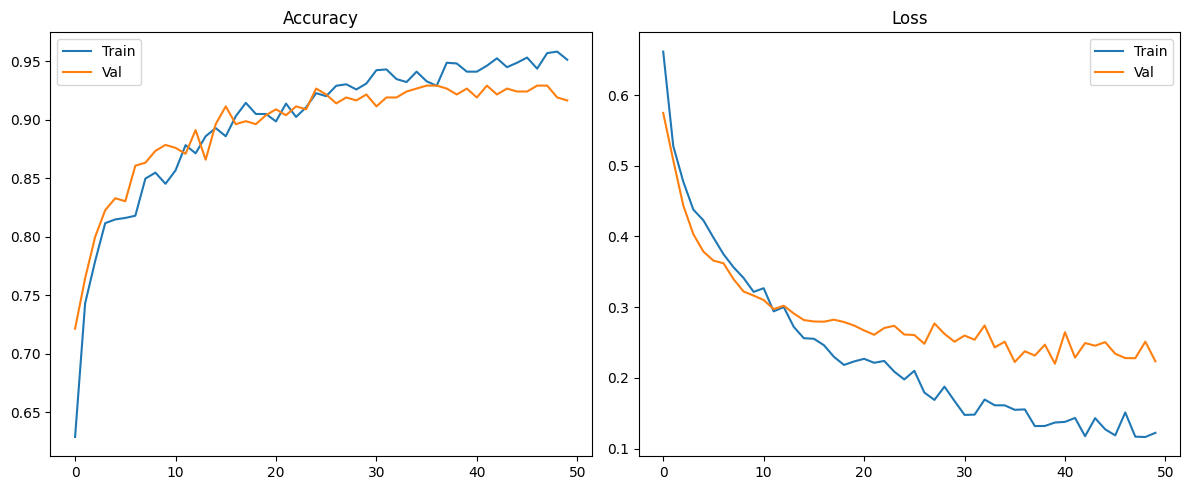

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()